In [151]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.layers import Dense, Reshape, Activation


import numpy as np

# Create Training Data

In [90]:
xs = np.array([[ 0.0, 0.0, 0.0],
               [ 0.1, 0.1, 0.1],
               [ 0.1, 0.0, 0.0],
               [ 0.0, 0.1, 0.0],
               [ 0.0, 0.0, 0.1],
               [ 1.0, 1.0, 1.0],
               [-1.0,-1.0,-1.0],
               [ 1.0, 0.0, 0.0],
               [ 0.0, 1.0, 0.0],
               [ 0.0, 0.0, 1.0]])
ys = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [-1],
               [-1],
               [-1],
               [-1],
               [-1]])

In [91]:
print(xs.shape, ys.shape)

(10, 3) (10, 1)


# Custom Loss function to check if Inputs are in hull

Wrinting custom loss function https://towardsdatascience.com/how-to-create-a-custom-loss-function-keras-3a89156ec69b

Using input in loss https://stackoverflow.com/questions/55445712/custom-loss-function-in-keras-based-on-the-input-data

Point inside the hull is 1, outside -1

In [113]:
def custom_loss(xs):
    def loss(y_true, y_pred):
        # calculate loss, using y_pred
        y_pred_fin = np.array([])
        print(y_true)
        print(xs, y_true, y_pred)
        for each in xs:
            # Weight*(Bias-Input)
            
            y_pred_fin.append(fin)
        return y_pred_fin
        
    return loss

# Build Model and fit

In [158]:
model = keras.models.Sequential()

dimensions = xs.shape[1]
nhp = dimensions + 1

model.add(Dense(1, input_shape=(dimensions,), activation='relu'))
model.add(Dense((nhp)*64, activation = "relu"))
model.add(Dense((nhp)*2, activation = "relu"))
model.add(Reshape((nhp,2)))
# model.add(Activation())
model.add(Activation(activation="tanh"))

#model.compile(optimizer='Adam', loss=custom_loss(xs), metrics = ["accuracy"])
model.compile(optimizer='Adam', loss="hinge", metrics = ["accuracy"])

# xs = np.array([[ 0.0, 0.0, 0.0]])
# ys = np.array([[1]])


In [159]:
history = model.fit(xs, ys, epochs=500, batch_size=1, verbose = 0)
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 1)                 4         
                                                                 
 dense_81 (Dense)            (None, 256)               512       
                                                                 
 dense_82 (Dense)            (None, 8)                 2056      
                                                                 
 reshape_6 (Reshape)         (None, 4, 2)              0         
                                                                 
 activation (Activation)     (None, 4, 2)              0         
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [162]:
xs_test = np.array([[ 0.0, 0.0, 0.0]])

model.predict(xs_test)

1/1 [==============================] - 0s 18ms/step


array([[[0.       , 0.       ],
        [0.       , 0.9983118],
        [0.       , 0.       ],
        [0.       , 0.9976251]]], dtype=float32)

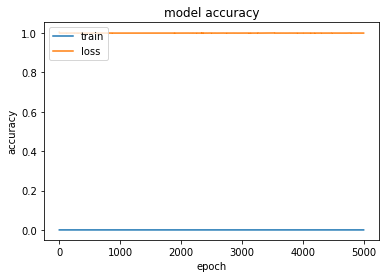

In [139]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [ ]:
print(history.history)